<center>

# Onde é mais lucrativo posicionar bases de guinchos na Região Sudeste?

</center>

Grupo 04:
Fernanda Madail, Kelly Oliveira, Kely Murta, Jared Leite, Michel José

<img src="https://img.freepik.com/fotos-gratis/caminhao-de-avaria-do-transportador-de-carro-durante-o-trabalho-usando-o-transporte-de-cinto-bloqueado-outro-carro-verde_1150-6453.jpg?w=1060&t=st=1706117265~exp=1706117865~hmac=01abba2b1aeb2bb276980b1ab9858adf187660c86358cbe9582e86b3085d27a0" width=650>

fonte: https://br.freepik.com/

### 1. Objetivo:

Navegar pelo trânsito brasileiro é como resolver um enigma complexo, onde cada peça representa um desafio único. Entre esses desafios, um se destaca pela sua gravidade: os acidentes de trânsito. No Brasil, infelizmente, eles são uma ocorrência comum, uma realidade que reflete a vastidão e a diversidade do país. As condições de tráfego podem mudar drasticamente de um lugar para outro, tornando a situação ainda mais complexa. A SS Soluções está realizando uma análise de dados para identificar áreas com alta frequência de acidentes de trânsito na Região Sudeste. A empresa planeja estabelecer 10 novas bases de guinchos nesses locais para oferecer um atendimento mais rápido às seguradoras de veículos, contribuindo para um trânsito mais seguro e eficiente.

### 2. Fonte de dados:
Ministério dos Transportes:
https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/registro-nacional-de-acidentes-e-estatisticas-de-transito

#### 2.1 Considerações iniciais fornecidas pelo site:
Nesse conjunto de dados não constam dados de rodovias federais (PRF) e existem alguns dados incompletos para alguns Estados no período de 2018 à 2022.

### 3. Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 4. Importação dos Dados

Optamos por utilizar o DataFrame **dfAcidentesOriginal** como base para a análise exploratória de dados, pois ele oferece uma visão abrangente dos acidentes de trânsito no Brasil, contendo informações essenciais. O conjunto atende de maneira adequada ao objetivo da SS Soluções, permitindo uma análise detalhada das regiões e períodos desejados para a implementação de bases de guinchos.

In [2]:
dfAcidentesOriginal= pd.read_csv('Acidentes_DadosAbertos_20230912.csv',sep=';',low_memory=False)
dfAcidentesOriginal

,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,2448623,AC1200401201801,2018-01-24,AC,2018,1,12018,1200401,QUARTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,3,3,0
1,3477494,AC1200385201801,2018-01-06,AC,2018,1,12018,1200385,SABADO,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
2,2939219,AC1200401201801,2018-01-04,AC,2018,1,12018,1200401,QUINTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
3,17595,AC1200203201801,2018-01-22,AC,2018,1,12018,1200203,SEGUNDA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4,58010,AC1200401201801,2018-01-21,AC,2018,1,12018,1200401,DOMINGO,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925598,4163385,TO1720853202305,2023-05-03,TO,2023,5,52023,1720853,QUARTA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4925599,3233251,TO1713304202305,2023-05-02,TO,2023,5,52023,1713304,TERCA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4925600,922960,TO1715754202305,2023-05-08,TO,2023,5,52023,1715754,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
4925601,3435150,TO1720804202305,2023-05-06,TO,2023,5,52023,1720804,SABADO,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,3,3,0


# Por que utilizamos 2 DataFrames?
---
Optamos por utilizar os DataFrames **dfAcidentesOriginal** e **dfLocalidadesOriginal** devido o complemento que as informações que oferecem. O primeiro fornece detalhes cruciais sobre acidentes de trânsito, incluindo local, data e características específicas. Enquanto o segundo apresenta dados demográficos e de tráfego por localidade. Integrar essas informações **é essencial** para uma análise abrangente, permitindo à empresa avaliar não apenas a incidência de acidentes, mas também entender o contexto demográfico e de tráfego de cada região. Essa abordagem oferece uma base sólida para a tomada de decisões estratégicas, visando posicionar as bases de guinchos de maneira mais eficiente e informada.


In [3]:
dfLocalidadesOriginal = pd.read_csv('Localidade_DadosAbertos_20230912.csv',sep=';',low_memory=False)
dfLocalidadesOriginal

,chv_localidade,ano_referencia,mes_referencia,mes_ano_referencia,regiao,uf,codigo_ibge,municipio,regiao_metropolitana,qtde_habitantes,frota_total,frota_circulante
0,AC1200708201801,2018,1,12018,NORTE,AC,1200708,XAPURI,nao,18174,3956,2824
1,AC1200807201801,2018,1,12018,NORTE,AC,1200807,PORTO ACRE,nao,17459,3764,2697
2,AC1200351201801,2018,1,12018,NORTE,AC,1200351,MARECHAL THAUMATURGO,nao,17897,313,206
3,AC1200328201801,2018,1,12018,NORTE,AC,1200328,JORDAO,nao,7858,101,58
4,AC1200138201801,2018,1,12018,NORTE,AC,1200138,BUJARI,nao,9664,2168,1587
...,...,...,...,...,...,...,...,...,...,...,...,...
363800,TO1708254202305,2023,5,52023,NORTE,TO,1708254,FORTALEZA DO TABOCAO,nao,2621,1419,1094
363801,TO1720903202305,2023,5,52023,NORTE,TO,1720903,TAGUATINGA,nao,17089,5315,3740
363802,TO1718303202305,2023,5,52023,NORTE,TO,1718303,PRAIA NORTE,nao,8618,1349,967
363803,TO1720002202305,2023,5,52023,NORTE,TO,1720002,SANTA TEREZINHA DO TOCANTINS,nao,2519,753,570


### 5. Análise e Limpeza

### 1º DataFrame: dfAcidentesOriginal

#### 5.1 Dados de Acidentes

Como primeira ação, utilizamos um .dtypes para obter informações sobre os tipos de dados de cada coluna no DataFrame dfAcidentesOriginal. Isso nos auxilia na compreensão da estrutura do DataFrame, ajuda a identificar colunas que podem ter tipos de dados inesperados e facilita o processo de preparação e limpeza de dados porque ao entender os tipos de dados, conseguimos aplicar as transformações específicas para o nosso objetivo.

In [4]:
dfAcidentesOriginal.dtypes

num_acidente              int64
chv_localidade           object
data_acidente            object
uf_acidente              object
ano_acidente              int64
mes_acidente              int64
mes_ano_acidente          int64
codigo_ibge               int64
dia_semana               object
fase_dia                 object
tp_acidente              object
cond_meteorologica       object
end_acidente             object
num_end_acidente          int64
cep_acidente              int64
bairro_acidente          object
km_via_acidente           int64
latitude_acidente       float64
longitude_acidente      float64
hora_acidente             int64
tp_rodovia               object
cond_pista               object
tp_cruzamento            object
tp_pavimento             object
tp_curva                 object
lim_velocidade           object
tp_pista                 object
ind_guardrail            object
ind_cantcentral          object
ind_acostamento          object
qtde_acidente             int64
qtde_aci

##### 5.1.1. Decisão de negócio:
Nossa base de dados contém registros de janeiro de 2018 a março de 2023, porém, a SS Soluções decidiu considerar os anos de 2021 a 2023 porque 2020 foi um ano atípico devido a pandemia e é interessante entender apenas como ficou a dinâmica de retomada às ruas. Além disso, como essa empresa pretende abrir apenas 10 novas bases, ela optou por analisar apenas os dados referentes à Região Sudeste do país. Pensando nisso, fizemos um filtro utilizando a função .query() do Pandas que busca na coluna uf_acidente (unidade federativa que aconteceu o acidente) as siglas dos estados do Rio de Janeiro, São Paulo, Minas Gerais e Espírito Santo e na coluna ano_acidente os anos de 2021, 2022 e 2023.

In [5]:
dfAcidentesFiltro = dfAcidentesOriginal.query('uf_acidente in ["ES","MG","SP","RJ"] & ano_acidente in [2021,2022,2023]' )
len(dfAcidentesFiltro)

1099005

In [6]:
dfAcidentesFiltro

,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
503378,1803571,ES3200607202101,2021-01-22,ES,2021,1,12021,3200607,SEXTA-FEIRA,NOITE,...,30 KMH,DUPLA SEM CICLOVIA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
503379,234395,ES3201308202101,2021-01-14,ES,2021,1,12021,3201308,QUINTA-FEIRA,TARDE,...,NAO INFORMADO,DUPLA SEM CICLOVIA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
503380,2101183,ES3205309202101,2021-01-06,ES,2021,1,12021,3205309,QUARTA-FEIRA,TARDE,...,NAO INFORMADO,DUPLA SEM CICLOVIA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
503381,2682253,ES3205002202101,2021-01-06,ES,2021,1,12021,3205002,QUARTA-FEIRA,TARDE,...,NAO INFORMADO,DUPLA SEM CICLOVIA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
503382,3900070,ES3202009202101,2021-01-10,ES,2021,1,12021,3202009,DOMINGO,TARDE,...,NAO INFORMADO,DUPLA SEM CICLOVIA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902405,3622435,SP3550308202302,2023-02-27,SP,2023,2,22023,3550308,SEGUNDA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SIM,DESCONHECIDO,1,0,4,4,0
4902406,2631456,SP3543402202302,2023-02-27,SP,2023,2,22023,3543402,SEGUNDA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SIM,SIM,1,0,1,1,0
4902407,3342411,SP3550308202302,2023-02-27,SP,2023,2,22023,3550308,SEGUNDA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,DESCONHECIDO,1,0,1,1,0
4902408,3883632,SP3550308202302,2023-02-27,SP,2023,2,22023,3550308,SEGUNDA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,DESCONHECIDO,1,0,0,0,0


In [7]:
#Salva arquivo filtrado
dfAcidentesFiltro.to_csv('AcidentesFiltro.csv')

#### 5.1.2 Informações das Colunas

Depois de alguns filtros estabelecidos, vamos começar a explorar o DataFrame. Primeiramente vendo quais são os nomes de todas as colunas e interpretando o que elas significam. Isso é interessante porque de cara veremos algumas colunas sem utilidade para a análise.   

In [8]:
dfAcidentesFiltro.columns

Index(['num_acidente', 'chv_localidade', 'data_acidente', 'uf_acidente',
       'ano_acidente', 'mes_acidente', 'mes_ano_acidente', 'codigo_ibge',
       'dia_semana', 'fase_dia', 'tp_acidente', 'cond_meteorologica',
       'end_acidente', 'num_end_acidente', 'cep_acidente', 'bairro_acidente',
       'km_via_acidente', 'latitude_acidente', 'longitude_acidente',
       'hora_acidente', 'tp_rodovia', 'cond_pista', 'tp_cruzamento',
       'tp_pavimento', 'tp_curva', 'lim_velocidade', 'tp_pista',
       'ind_guardrail', 'ind_cantcentral', 'ind_acostamento', 'qtde_acidente',
       'qtde_acid_com_obitos', 'qtde_envolvidos', 'qtde_feridosilesos',
       'qtde_obitos'],
      dtype='object')

In [9]:
dfAcidentesFiltro.describe()

,num_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,num_end_acidente,cep_acidente,km_via_acidente,latitude_acidente,longitude_acidente,hora_acidente,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
count,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,644856.000000,644856.000000,1.099005e+06,1099005.0,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06
mean,2.519676e+06,2.021680e+03,6.258523e+00,6.460691e+04,3.268615e+06,5.986119e+02,1.726739e+06,3.441589e+01,-18.784772,-41.573748,1.391627e+05,1.0,1.524925e-02,1.442981e+00,1.426879e+00,1.610184e-02
std,1.452195e+06,6.774044e-01,3.466475e+00,3.466457e+04,2.917034e+05,1.764426e+03,7.482693e+06,2.617739e+02,5.358230,11.568726,5.891283e+04,0.0,1.225427e-01,1.146321e+00,1.147843e+00,1.346008e-01
min,1.500000e+01,2.021000e+03,1.000000e+00,1.202100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-25.051740,-53.064254,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.259257e+06,2.021000e+03,3.000000e+00,3.202200e+04,3.118601e+06,0.000000e+00,0.000000e+00,0.000000e+00,-20.530509,-45.972629,1.000000e+05,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.525588e+06,2.022000e+03,6.000000e+00,6.202100e+04,3.169307e+06,5.100000e+01,0.000000e+00,0.000000e+00,-19.920681,-44.004482,1.440000e+05,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,3.779442e+06,2.022000e+03,9.000000e+00,9.202200e+04,3.522307e+06,4.770000e+02,0.000000e+00,0.000000e+00,-19.461793,-43.596212,1.820000e+05,1.0,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
max,5.028070e+06,2.023000e+03,1.200000e+01,1.220220e+05,3.557303e+06,9.999900e+04,3.999900e+07,9.999000e+03,-0.000000,-0.000000,9.999990e+05,1.0,1.000000e+00,6.700000e+01,6.700000e+01,7.000000e+00


   Essa tabela descreve estatísticas sobre as variáveis presentes no DataFrame "dfAcidentesFiltro". Aqui estão algumas interpretações importantes:
- num_acidente: O número de acidentes varia de 15 a 5.028.070, com uma média de 2.519.676. A distribuição é ampla, indicando uma grande variação no número de acidentes.

- ano_acidente: Todos os acidentes ocorreram entre 2021 e 2023, com a maioria ocorrendo em 2022.

- mes_acidente: Os acidentes estão distribuídos ao longo do ano, com uma média de 6,26, o que sugere que eles são ligeiramente mais comuns na segunda metade do ano.

- codigo_ibge: O código IBGE varia de 0 a 3.557.303, com uma média de 3.268.615. Isso sugere que os acidentes estão distribuídos em várias regiões.

- cep_acidente: O CEP do acidente varia muito, indicando que os acidentes ocorrem em uma ampla gama de locais.

- qtde_acidente: Todos os registros têm 1 acidente, indicando que cada linha representa um acidente único.

- qtde_acid_com_obitos: A maioria dos acidentes não resulta em mortes, como indicado pela mediana e quartis.

- qtde_envolvidos: Em média, 1,44 pessoas estão envolvidas em cada acidente.

- qtde_feridosilesos: Em média, 1,43 pessoas saem feridas ou ilesas em cada acidente.

- qtde_obitos: A maioria dos acidentes não resulta em mortes, como indicado pela mediana e quartis.


Como saber se **num_acidente** é um identificador único para cada acidente?

Neste código, **num_acidente_distinct_count** calcula o número de valores únicos na coluna **num_acidente**, e **comprimento_total_df** obtém o comprimento total do DataFrame. Em seguida, uma comparação é feita para verificar se os dois valores são iguais. Se forem iguais, isso sugere que todos os valores em num_acidente são únicos. Caso contrário, pode haver duplicatas nessa coluna.

In [10]:
# Distinct count em num_acidente
num_acidente_distinct_count = dfAcidentesFiltro['num_acidente'].nunique()

# Comprimento total do DataFrame
comprimento_total_df = len(dfAcidentesFiltro)

# Comparação
print(f"Número de acidentes únicos: {num_acidente_distinct_count}")
print(f"Comprimento total do DataFrame: {comprimento_total_df}")

# Verificação se são iguais
if num_acidente_distinct_count == comprimento_total_df:
    print("O número de acidentes únicos é igual ao comprimento total do DataFrame.")
else:
    print("O número de acidentes únicos é diferente do comprimento total do DataFrame.")

Número de acidentes únicos: 1099005
Comprimento total do DataFrame: 1099005
O número de acidentes únicos é igual ao comprimento total do DataFrame.


Conclusão: cada registro corresponde a um único acidente

#### 5.1.3 Colunas de Interesse

Após olhar para o objetivo e os dados de cada coluna no Dataframe, decidimos por selecionar as colunas interessantes para a construção dessa análise. São elas: chv_localidade, ano_acidente, mes_acidente, uf_acidente, bairro_acidente e qtde_envolvidos. Esclarecemos que qtde_envolvidos corresponde ao número de pessoas envolvidas no acidente.

In [11]:
dfAcidentes = dfAcidentesFiltro[['chv_localidade','ano_acidente','mes_acidente',
                                 'uf_acidente','bairro_acidente','qtde_envolvidos']]
dfAcidentes

,chv_localidade,ano_acidente,mes_acidente,uf_acidente,bairro_acidente,qtde_envolvidos
503378,ES3200607202101,2021,1,ES,CENTRO,2
503379,ES3201308202101,2021,1,ES,PORTO NOVO,2
503380,ES3205309202101,2021,1,ES,GRANDE VITORIA,2
503381,ES3205002202101,2021,1,ES,PARQUE RESIDENCIAL LARANJEIRAS,2
503382,ES3202009202101,2021,1,ES,PATRIMONIO MUNDO NOVO,2
...,...,...,...,...,...,...
4902405,SP3550308202302,2023,2,SP,RAPOSO TAVARES,4
4902406,SP3543402202302,2023,2,SP,PARQUE RES CANDIDO P,1
4902407,SP3550308202302,2023,2,SP,PARI,1
4902408,SP3550308202302,2023,2,SP,ITAQUERA,0


Já com os dados de interesse, verificamos o número de valores faltantes dentro do df. Percebemos que apenas a coluna de bairros entrega uma porcentagem de NaN.

In [12]:
dfAcidentes.isnull().sum()/len(dfAcidentes)

chv_localidade     0.000000
ano_acidente       0.000000
mes_acidente       0.000000
uf_acidente        0.000000
bairro_acidente    0.165634
qtde_envolvidos    0.000000
dtype: float64

Esses valores não serão considerados para escolha do local das oficinas, mas os acidentes poderam ser contabilizados para indicador de taxa de acidentes percentual das cidades. Entendemos que os bairros nulos poderiam ser preenchidos via coordenadas de latitude e longitude, disponíveis em colunas do DataFrame dfAcidentesOriginal, mas tal ajuste está fora do escopo deste trabalho.

### 2º DataFrame: dfLocalidadesOriginal

#### 5.2 Dados de Localidades

O mesmo procedimento foi aplicado para esse segundo df: verificamos os tipos de dados das colunas, filtramos por UF e ano e analisamos a quantidade de valores faltantes, que é nula para esse conjunto de dados.

In [13]:
dfLocalidadesOriginal.dtypes

chv_localidade          object
ano_referencia           int64
mes_referencia           int64
mes_ano_referencia       int64
regiao                  object
uf                      object
codigo_ibge              int64
municipio               object
regiao_metropolitana    object
qtde_habitantes          int64
frota_total              int64
frota_circulante         int64
dtype: object

In [14]:
dfLocalidadesFiltro = dfLocalidadesOriginal.query('uf in ["ES","MG","SP","RJ"] & ano_referencia in [2023,2022,2021]' )
len(dfLocalidadesFiltro)

48488

In [15]:
dfLocalidadesFiltro.isnull().sum()/len(dfLocalidadesFiltro)

chv_localidade          0.0
ano_referencia          0.0
mes_referencia          0.0
mes_ano_referencia      0.0
regiao                  0.0
uf                      0.0
codigo_ibge             0.0
municipio               0.0
regiao_metropolitana    0.0
qtde_habitantes         0.0
frota_total             0.0
frota_circulante        0.0
dtype: float64

#### 5.2.1 Colunas de Interesse

Nesse df nós optamos por pegar as colunas chv_localidade, municipio, regiao_metropolitana, qtde_habitantes e frota_circulante.

In [16]:
dfLocalidades = dfLocalidadesFiltro[['chv_localidade','municipio','regiao_metropolitana','qtde_habitantes','frota_circulante']]
dfLocalidades

,chv_localidade,municipio,regiao_metropolitana,qtde_habitantes,frota_circulante
55559,ES3201407202101,CASTELO,nao,37747,18334
55560,ES3200359202101,ALTO RIO NOVO,nao,7874,2668
55561,ES3200201202101,ALEGRE,nao,29975,10261
55562,ES3204054202101,PEDRO CANARIO,nao,26381,7260
55563,ES3202652202101,IRUPI,nao,13526,6645
...,...,...,...,...,...
354700,SP3508702202305,CACONDE,nao,19016,6019
354701,SP3512001202305,COLINA,nao,18669,8301
354702,SP3507407202305,BORBOREMA,nao,16450,6921
354703,SP3557006202305,VOTORANTIM,nao,126265,53575


#### 5.3 União das Tabelas

Como temos dados de interesse nos 2 DataFrames, nós juntamos ele por meio do merge(), comparando pela coluna de chave localidade (chv_localidade) que é o ID de cada acidente e com a especifidade de que apenas as linhas que têm correspondências em ambas as tabelas são incluídas no DataFrame resultante, o nosso principal a partir de agora.

In [17]:
dfPrincipal= pd.merge(dfAcidentes, dfLocalidades, on='chv_localidade', how='inner')
dfPrincipal

,chv_localidade,ano_acidente,mes_acidente,uf_acidente,bairro_acidente,qtde_envolvidos,municipio,regiao_metropolitana,qtde_habitantes,frota_circulante
0,ES3200607202101,2021,1,ES,CENTRO,2,ARACRUZ,nao,103101,36428
1,ES3200607202101,2021,1,ES,ZONA RURAL,2,ARACRUZ,nao,103101,36428
2,ES3200607202101,2021,1,ES,ZONA RURAL,2,ARACRUZ,nao,103101,36428
3,ES3200607202101,2021,1,ES,IRAJA,2,ARACRUZ,nao,103101,36428
4,ES3200607202101,2021,1,ES,CENTRO,2,ARACRUZ,nao,103101,36428
...,...,...,...,...,...,...,...,...,...,...
1099000,SP3553302202302,2023,2,SP,JARDIM SAO JOAO,2,TAMBAU,nao,23234,10095
1099001,SP3547106202302,2023,2,SP,CENTRO,3,SANTA MERCEDES,nao,2945,1094
1099002,SP3540259202302,2023,2,SP,NaN,0,PONTALINDA,nao,4777,1250
1099003,SP3520608202302,2023,2,SP,JD ITAPURA,2,INDIANA,nao,4851,2118


#### 5.3.1 Confere Tamanho de Dataframes
Para conferir se no processo de merge não aconteceu nenhuma duplicação de linhas, fizemos uma comparação entre a quantidade de linhas do dfPrincipal e dfAcidentes.

In [18]:
len(dfAcidentes) == len(dfPrincipal)

True

In [19]:
dfPrincipal.describe()

,ano_acidente,mes_acidente,qtde_envolvidos,qtde_habitantes,frota_circulante
count,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06,1.099005e+06
mean,2.021680e+03,6.258523e+00,1.442981e+00,1.717750e+06,7.415430e+05
std,6.774044e-01,3.466475e+00,1.146321e+00,3.409952e+06,1.336508e+06
min,2.021000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,3.000000e+00,1.000000e+00,8.127500e+04,3.522900e+04
50%,2.022000e+03,6.000000e+00,1.000000e+00,3.211090e+05,1.219570e+05
75%,2.022000e+03,9.000000e+00,2.000000e+00,1.412553e+06,5.608040e+05
max,2.023000e+03,1.200000e+01,6.700000e+01,1.247637e+07,5.068917e+06


Essa tabela descreve estatísticas sobre as variáveis presentes no DataFrame "dfPrincipal". Aqui estão algumas interpretações importantes:

- ano_acidente: Todos os acidentes ocorreram entre 2021 e 2023, com a maioria ocorrendo em 2022.

- mes_acidente: Os acidentes estão distribuídos ao longo do ano, com uma média de 6,26, o que sugere que eles são ligeiramente mais comuns na segunda metade do ano.

- qtde_envolvidos: Em média, 1,44 estão envolvidos em cada acidente. O número máximo de envolvidos em um único acidente é 67.

- qtde_habitantes: A população das áreas onde ocorreram os acidentes varia de 0 a 12.476.370, com uma média de 1.717.750. Isso sugere que os acidentes ocorrem tanto em áreas densamente povoadas quanto em áreas menos povoadas.

- frota_circulante: A frota circulante nas áreas onde ocorreram os acidentes varia de 0 a 5.068.917, com uma média de 741.543. Isso sugere que os acidentes ocorrem em áreas com diferentes tamanhos de frota circulante.

#### 5.3.2 Tratamento dos bairros Nulos

Logo acima descobrimos que algumas informações de bairros estão com valores faltantes, então é hora de tratá-los.

In [20]:
dfPrincipal.isnull().sum()/len(dfPrincipal)

chv_localidade          0.000000
ano_acidente            0.000000
mes_acidente            0.000000
uf_acidente             0.000000
bairro_acidente         0.165634
qtde_envolvidos         0.000000
municipio               0.000000
regiao_metropolitana    0.000000
qtde_habitantes         0.000000
frota_circulante        0.000000
dtype: float64

In [21]:
dfBairrosNulos = dfPrincipal[dfPrincipal['bairro_acidente'].isnull()]
dfBairrosNulos

,chv_localidade,ano_acidente,mes_acidente,uf_acidente,bairro_acidente,qtde_envolvidos,municipio,regiao_metropolitana,qtde_habitantes,frota_circulante
61641,MG3136702202101,2021,1,MG,NaN,1,JUIZ DE FORA,nao,573285,185971
61642,MG3136702202101,2021,1,MG,NaN,2,JUIZ DE FORA,nao,573285,185971
61643,MG3136702202101,2021,1,MG,NaN,3,JUIZ DE FORA,nao,573285,185971
61644,MG3136702202101,2021,1,MG,NaN,1,JUIZ DE FORA,nao,573285,185971
61645,MG3136702202101,2021,1,MG,NaN,2,JUIZ DE FORA,nao,573285,185971
...,...,...,...,...,...,...,...,...,...,...
1098898,SP3509957202302,2023,2,SP,NaN,0,CANAS,nao,5353,1591
1098899,SP3509957202302,2023,2,SP,NaN,0,CANAS,nao,5353,1591
1098934,SP3518859202302,2023,2,SP,NaN,0,GUATAPARA,nao,7820,2129
1098951,SP3544301202302,2023,2,SP,NaN,0,ROSEIRA,nao,10995,3739


#### 5.3.3. Remoção de Bairros Nulos

Como estamos fazendo uma amostra que leva em conta a região e isso é um determinante para a empresa, não é interessante manter as linhas que contenham valores faltantes de bairro, sendo assim, fizemos uma máscara booleana utilizando a função notnull que nos retorna um df com apenas as linhas sem NaN.

In [22]:
dfPrincipalSemNulos = dfPrincipal[dfPrincipal['bairro_acidente'].notnull()]
dfPrincipalSemNulos

,chv_localidade,ano_acidente,mes_acidente,uf_acidente,bairro_acidente,qtde_envolvidos,municipio,regiao_metropolitana,qtde_habitantes,frota_circulante
0,ES3200607202101,2021,1,ES,CENTRO,2,ARACRUZ,nao,103101,36428
1,ES3200607202101,2021,1,ES,ZONA RURAL,2,ARACRUZ,nao,103101,36428
2,ES3200607202101,2021,1,ES,ZONA RURAL,2,ARACRUZ,nao,103101,36428
3,ES3200607202101,2021,1,ES,IRAJA,2,ARACRUZ,nao,103101,36428
4,ES3200607202101,2021,1,ES,CENTRO,2,ARACRUZ,nao,103101,36428
...,...,...,...,...,...,...,...,...,...,...
1098999,SP3545605202302,2023,2,SP,JARDIM RAUL BORGES,0,SANTA ADELIA,nao,15722,7361
1099000,SP3553302202302,2023,2,SP,JARDIM SAO JOAO,2,TAMBAU,nao,23234,10095
1099001,SP3547106202302,2023,2,SP,CENTRO,3,SANTA MERCEDES,nao,2945,1094
1099003,SP3520608202302,2023,2,SP,JD ITAPURA,2,INDIANA,nao,4851,2118


Verificamos novamente os tipos das colunas para não correr o risco de ter acontecido alguma alteração no merge.

In [23]:
dfPrincipalSemNulos.dtypes

chv_localidade          object
ano_acidente             int64
mes_acidente             int64
uf_acidente             object
bairro_acidente         object
qtde_envolvidos          int64
municipio               object
regiao_metropolitana    object
qtde_habitantes          int64
frota_circulante         int64
dtype: object

Decisão: usar a quantidade de pessoas envolvidas como métrica principal
qtde_envolvidos se refere a quantidade de pessoas envolvidas em cada acidente e analisando o a descição desse df podemos notar que essa medida parece ser bem comportada no geral. Porém o valor máximo chama a atenção: 67 pessoas envolvidas em um único acidente, por isso, decidimos ver se essa coluna possui outliers a partir de uma boxplot.

In [24]:
dfPrincipalSemNulos.describe()

,ano_acidente,mes_acidente,qtde_envolvidos,qtde_habitantes,frota_circulante
count,916972.000000,916972.000000,916972.000000,9.169720e+05,9.169720e+05
mean,2021.727902,6.554189,1.390941,1.934601e+06,8.333208e+05
std,0.670514,3.447572,1.145252,3.644733e+06,1.422498e+06
min,2021.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,2021.000000,4.000000,1.000000,1.031110e+05,4.232400e+04
50%,2022.000000,7.000000,1.000000,3.687820e+05,1.462570e+05
75%,2022.000000,10.000000,2.000000,2.527270e+06,1.350233e+06
max,2023.000000,12.000000,67.000000,1.247637e+07,5.068917e+06


Notamos que, no **describe**, o número mínimo de pessoas envolvidas em um acidente é 0. No entanto, se não houver pessoas envolvidas, não existirão "segurados", e, consequentemente, não haverá veículos motorizados e guincháveis, como carros e motos. Isso não é relevante para a análise em questão. Portanto, optamos por restringir os dados, mantendo apenas as linhas em que a quantidade de envolvidos seja diferente de 0.

In [26]:
dfPrincipalSemNulos = dfPrincipalSemNulos.query('qtde_envolvidos!=0')
dfPrincipalSemNulos.describe()

,ano_acidente,mes_acidente,qtde_envolvidos,qtde_habitantes,frota_circulante
count,703704.000000,703704.000000,703704.000000,7.037040e+05,7.037040e+05
mean,2021.778796,6.267085,1.812487,1.575588e+06,7.187131e+05
std,0.695324,3.431154,0.972140,2.981892e+06,1.193115e+06
min,2021.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2021.000000,3.000000,1.000000,9.783100e+04,4.017400e+04
50%,2022.000000,6.000000,2.000000,3.708390e+05,1.491230e+05
75%,2022.000000,9.000000,2.000000,2.527270e+06,1.366625e+06
max,2023.000000,12.000000,67.000000,1.247637e+07,5.068917e+06


### 6. Ranking

### Agora chegou o momento de rankear as cidades e bairros com o maior número de acidentes do Brasil.

Para fazer isso, primeiro agrupamos os dados de forma que obtemos a quantidade de acidentes em cada combinação única de uf_acidente e município. Cada linha resultante representa uma combinação única dessas variáveis, e a coluna qtd_acidentes indica quantos acidentes ocorreram para cada combinação.

#### 6.1 Ranking Município/Média Mensal

In [27]:
dfResumoCidades=dfPrincipal.groupby(['uf_acidente','municipio']).size().reset_index(name='qtd_acidentes')
dfResumoCidades

,uf_acidente,municipio,qtd_acidentes
0,ES,AFONSO CLAUDIO,403
1,ES,AGUA DOCE DO NORTE,167
2,ES,AGUIA BRANCA,169
3,ES,ALEGRE,198
4,ES,ALFREDO CHAVES,157
...,...,...,...
1652,SP,VISTA ALEGRE DO ALTO,28
1653,SP,VITORIA BRASIL,15
1654,SP,VOTORANTIM,915
1655,SP,VOTUPORANGA,1968


Por fim, fizemos a média mensal de acidentes através de uma operação simples entre colunas do df e o número de meses englobado no período de janeiro de 2021 a maio de 2023.

In [28]:
dfResumoCidadesMediaMensal = dfResumoCidades
dfResumoCidadesMediaMensal['media_mensal_acidentes'] = dfResumoCidades['qtd_acidentes']/29
dfRankingCidades = dfResumoCidadesMediaMensal.sort_values(by='media_mensal_acidentes', ascending=False)
dfRankingCidades.head(10)

,uf_acidente,municipio,qtd_acidentes,media_mensal_acidentes
144,MG,BELO HORIZONTE,162977,5619.896552
1576,SP,SAO PAULO,91359,3150.310345
284,MG,CONTAGEM,40924,1411.172414
904,MG,UBERLANDIA,31933,1101.137931
150,MG,BETIM,18738,646.137931
999,RJ,RIO DE JANEIRO,17256,595.034483
497,MG,JUIZ DE FORA,14372,495.586207
903,MG,UBERABA,11890,410.000000
579,MG,MONTES CLAROS,10861,374.517241
1226,SP,GUARULHOS,10551,363.827586


#### 6.2 Ranking Bairro/Média Mensal

Para analisar por bairros, agrupamos os dados de forma que obtemos a quantidade de acidentes em cada combinação única de uf_acidente, bairro_acidente e municipio.

In [29]:
dfResumoBairros=dfPrincipalSemNulos.groupby(['uf_acidente','bairro_acidente','municipio']).size().reset_index(name='qtd_acidentes')
dfResumoBairros

,uf_acidente,bairro_acidente,municipio,qtd_acidentes
0,ES,ABELARDO MACHADO,CACHOEIRO DE ITAPEMIRIM,29
1,ES,ACABAJA,ECOPORANGA,1
2,ES,ACAMPAMENTO,COLATINA,2
3,ES,ACAPULCO,MARATAIZES,24
4,ES,ACIOLI,JOAO NEIVA,2
...,...,...,...,...
34403,SP,ZONA RURAL,SANTA ADELIA,18
34404,SP,ZONA RURAL,SANTOPOLIS DO AGUAPEI,5
34405,SP,ZONA RURAL,SERRA NEGRA,28
34406,SP,ZONA RURAL,SOCORRO,1


Aqui também fizemos a média mensal de acidentes para o período de tempo de 29 meses.

In [30]:
dfResumoBairrosMediaMensal = dfResumoBairros
dfResumoBairrosMediaMensal['media_mensal_acidentes'] = dfResumoBairros['qtd_acidentes']/29
dfResumoBairrosMediaMensal
dfRanking = dfResumoBairrosMediaMensal.sort_values(by='media_mensal_acidentes', ascending=False)
dfRanking.head(10)

,uf_acidente,bairro_acidente,municipio,qtd_acidentes,media_mensal_acidentes
4601,MG,CENTRO,BELO HORIZONTE,5845,201.551724
5617,MG,CIDADE INDUSTRIAL,CONTAGEM,3417,117.827586
13346,MG,SANTA EFIGENIA,BELO HORIZONTE,3011,103.827586
11285,MG,PADRE EUSTAQUIO,BELO HORIZONTE,2456,84.689655
14757,MG,SAVASSI,BELO HORIZONTE,2425,83.620690
4384,MG,CARLOS PRATES,BELO HORIZONTE,2136,73.655172
4772,MG,CENTRO,DIVINOPOLIS,2049,70.655172
9690,MG,LOURDES,BELO HORIZONTE,1958,67.517241
13540,MG,SANTA MONICA,UBERLANDIA,1951,67.275862
14086,MG,SAO FRANCISCO,BELO HORIZONTE,1884,64.965517


In [31]:
dfRanking.to_csv('Ranking.csv')

### 7. Gráficos representativos

#### 7.1 Gráfico de barras para a média mensal de acidentes por município

Como podemos observar no gráfico a abaixo referenciando a secão 6.1 Ranking Município/Média Mensal esses os 10 munípios com a maior média mensal de acidentes registrados.

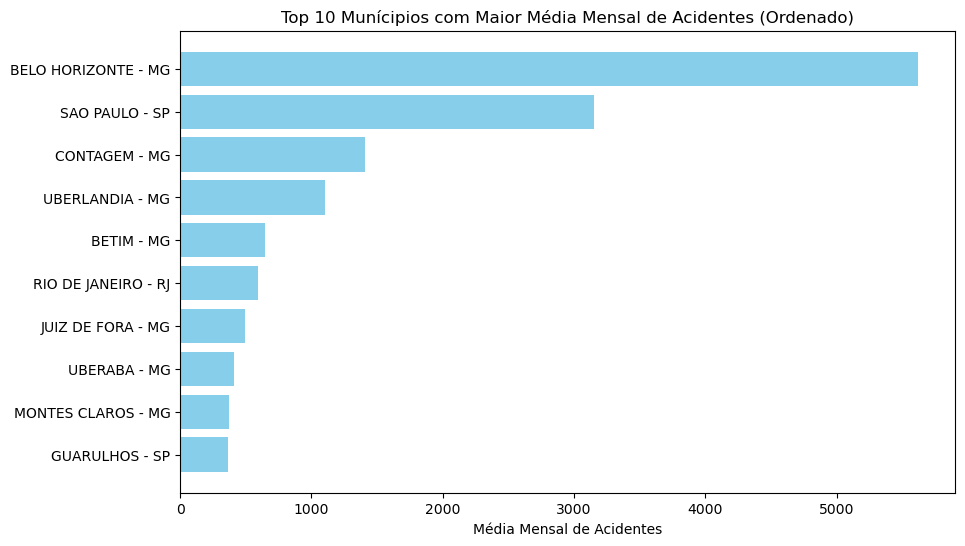

In [32]:
dfRankingCidades = dfRankingCidades.sort_values(by='media_mensal_acidentes', ascending=False)

municipios = dfRankingCidades.head(10)['municipio']
ufs = dfRankingCidades.head(10)['uf_acidente']
media_mensal_acidentes = dfRankingCidades.head(10)['media_mensal_acidentes']

plt.figure(figsize=(10, 6))
plt.barh([f"{cidade} - {uf}" for cidade, uf in zip(municipios , ufs)], media_mensal_acidentes, color='skyblue')
plt.xlabel('Média Mensal de Acidentes')
plt.title('Top 10 Munícipios com Maior Média Mensal de Acidentes (Ordenado)')
plt.gca().invert_yaxis()  

#### 7.2 Gráfico de barras para a média mensal de acidentes por bairro

Como podemos observar na secão 6.2 Ranking Bairro/Média Mensal esses os 10 bairros com a maior média mensal de acidentes registrados.

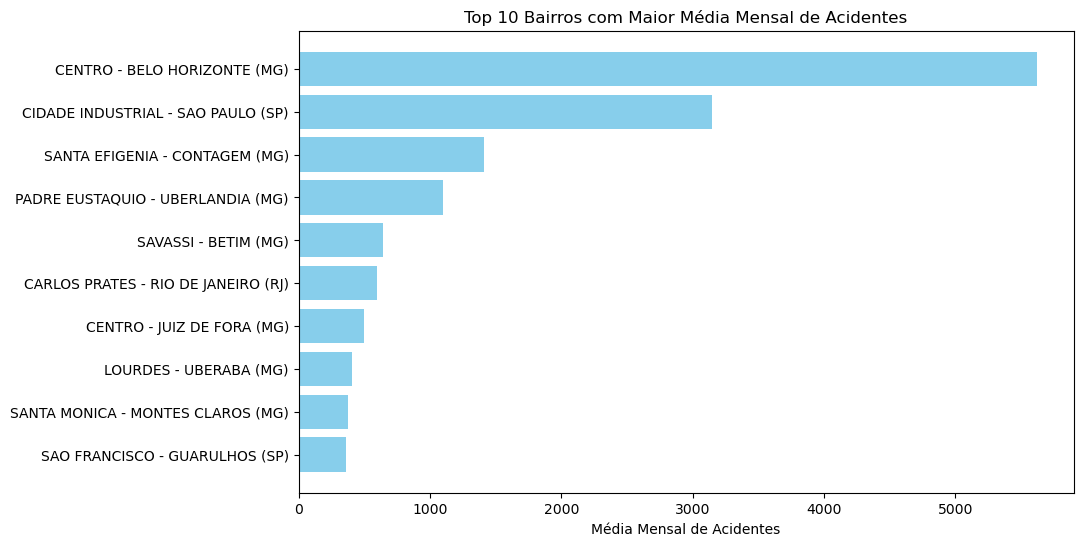

In [33]:
bairros = dfRanking.head(10)['bairro_acidente']

plt.figure(figsize=(10, 6))
plt.barh([f"{bairro} - {municipio} ({uf})" for bairro, municipio, uf in zip(bairros, municipios, ufs)],
         media_mensal_acidentes, color='skyblue')

plt.xlabel('Média Mensal de Acidentes')
plt.title('Top 10 Bairros com Maior Média Mensal de Acidentes')
plt.gca().invert_yaxis()
plt.show()

#### 7.3 Insights

Os dados se referem aos locais onde a empresa SS poderia considerar posicionar suas bases de guincho para atender a maior quantidade de acidentes possíveis. No entanto, outros fatores também devem ser considerados, como a facilidade de acesso aos locais de acidente, a distribuição geográfica das bases e a demanda durante diferentes períodos do dia. Recomenda-se realizar uma análise mais detalhada considerando todos esses fatores.

### 8. Conclusão 

- Foco na retomada pós-pandêmica: Ao considerar os anos de 2021 a 2023, a empresa está focando na dinâmica de retomada às ruas após o ano atípico de 2020 devido à pandemia. Isso permite uma análise mais precisa das tendências atuais.

- Análise regionalizada: A empresa optou por analisar apenas os dados referentes à região Sudeste do país. Isso permite uma análise mais focada e relevante, já que a empresa pretende abrir apenas 10 novas bases.

- Identificação de áreas de alto risco: O código identifica os municípios e bairros com a maior média mensal de acidentes em cada estado da região Sudeste. Isso pode ajudar a empresa a identificar áreas de alto risco(acidentes) e alocar recursos de maneira mais eficaz.

- Informações relevantes: A ánalise fornece informações detalhadas sobre a média mensal de acidentes em cada bairro dos municípios selecionados. Isso pode fornecer insights valiosos para a empresa ao planejar a localização de suas novas bases.